## 使用tf风格迁移

In [1]:
import matplotlib.pyplot as plt 
import tensorflow_hub as hub 
import tensorflow as tf
import numpy as np


In [2]:
def corp_center(image):
    """返回一个依据中心裁剪的图片(正方形)
    """
    # TODO 这里的接口都是什么意思？
    shape = image.shape
    new_shape = min(shape[1], shape[2])
    offset_y = max(shape[1]-shape[2], 0) // 2
    offset_x = max(shape[2]-shape[1], 0)// 2
    image = tf.image.crop_to_bounding_box(image, offset_y, offset_x, new_shape, new_shape)
    return image

def load_image_local(image_path, image_size=(512, 512), preserve_aspect_ratio=True):
    """读取图片并转化为float32的numpy数组,并把像素值归一化到0-1之间
    """
    # 读取图片, 转化为float32的Numpy数组，然后增加一维batch dimension
    img = plt.imread(image_path).astype(np.float32)[np.newaxis, ...]
    # 归一化
    if img.max() > 1.0:
        img = img / 255.0
    if len(img.shape) == 3:
        img = tf.stack([img, img, img], axis=-1)
    img = corp_center(img)
    img = tf.image.resize(img, image_size, preserve_aspect_ratio=preserve_aspect_ratio)
    
    return img

def show(image, title, save=False, fig_dpi=300):
    """显示图片
    """
    # equal代表代表控制轴的纵横比为1，保证像素为方形
    plt.imshow(image, aspect="equal")
    # 是否显示坐标轴
    plt.axis('off')
    # 显示或保存图片
    if save:
        plt.savefig(title+".png", bbox_inches='tight', dpi=fig_dpi, pad_inches=0.0)
    else:
        plt.show()


### 加载模型并运行代码

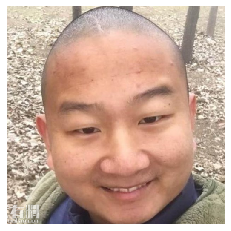

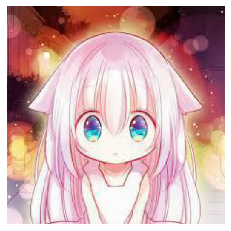

In [3]:
# 图片地址
content_image_path="./images/pic3.png"
stype_image_path='./images/pic4.png'
# 加载图片
content_image = load_image_local(content_image_path)
style_image = load_image_local(stype_image_path)
# 预览图片(为什么要加0)
show(content_image[0], "content_image")
show(style_image[0], "stype_image")

In [5]:
content_image.shape
#style_image.shape

TensorShape([1, 512, 512, 4])

## 加载模型

In [6]:
hub_model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

In [9]:
outputs = hub_model(tf.constant(content_image[:,:,:,:3]), tf.constant(style_image[:,:,:,:3]))
stylized_image = outputs[0]

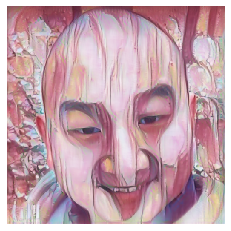

In [13]:
show(stylized_image[0],"giao2cartoon", True)

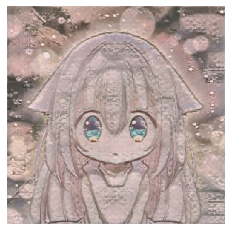

In [16]:
## 交换下位置
outputs2 = hub_model(tf.constant(style_image[:,:,:,:3]), tf.constant(content_image[:,:,:,:3]))
stylized_image2 = outputs2[0]

show(stylized_image2[0], "cartoon2giao", True)
